# **Motorcycle Price Prediction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import xgboost as xgb

%matplotlib inline

In [2]:
bike_dataset = pd.read_csv('data/BIKE DETAILS.csv')
bike_dataset.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
bike_dataset.shape

(1061, 7)

In [4]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
bike_dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
bike_dataset.dropna(inplace=True)

In [7]:
bike_dataset.describe()

,selling_price,year,km_driven,ex_showroom_price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [8]:
print(bike_dataset.seller_type.value_counts())
print(bike_dataset.owner.value_counts())


seller_type
Individual    623
Dealer          3
Name: count, dtype: int64
owner
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
Name: count, dtype: int64


In [9]:
bike_dataset['seller_type'] = LabelEncoder().fit_transform(bike_dataset['seller_type'])
bike_dataset['owner'] = LabelEncoder().fit_transform(bike_dataset['owner'])

bike_dataset.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,0,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,0,23000,89643.0
5,Honda CB Twister,18000,2010,1,0,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,1,0,17000,87719.0
9,Bajaj Discover 125,50000,2016,1,0,42000,60122.0
10,Yamaha FZ16,35000,2015,1,0,32000,78712.0
11,Honda Navi,28000,2016,1,1,10000,47255.0
12,Bajaj Avenger Street 220,80000,2018,1,0,21178,95955.0
13,Yamaha YZF R3,365000,2019,1,0,1127,351680.0
15,Suzuki Access 125 [2007-2016],25000,2012,1,0,55000,58314.0


In [10]:
X = bike_dataset.drop(columns=['name', 'selling_price'], axis=1)
X = StandardScaler().fit_transform(X)
y = bike_dataset['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## **Linear Regression**

In [11]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

lr_model = LinearRegression()
lr_model_cv = GridSearchCV(lr_model, param_grid, cv=3, n_jobs=-1 , scoring='r2')
lr_model_cv.fit(X_train, y_train)
y_pred_lr = lr_model_cv.predict(X_test)

res = r2_score(y_test, y_pred_lr)
print(res)

score = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', lr_model_cv.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_lr))

0.9181751792244137
Cross Val score  [0.91480217 0.88676617 0.78327949 0.85346323 0.77362793] 0.8423877982309198 0.05578110621352055
Best Params to use  {'copy_X': True, 'fit_intercept': True, 'positive': True}
Mean Absolute error: 12889.953989
Root Mean Squared error: 26989.855403


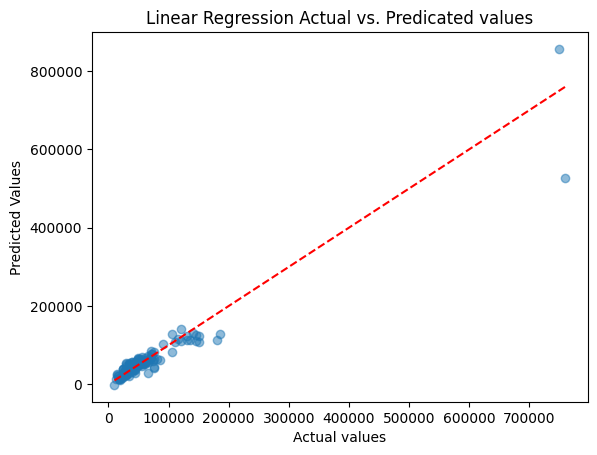

In [12]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Actual vs. Predicated values')
plt.show()

### **Decision Tree Regressor**

In [13]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=0)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, scoring='r2')
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

res_dt = r2_score(y_test, y_pred_dt)
print(res_dt)
score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_dt.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_dt))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_dt))

0.6679938924153378
Cross Val score  [0.49046936 0.76125206 0.71220391 0.80753635 0.27485596] 0.6092635297689419 0.19947422141852597
Best Params to use  {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mean Absolute error: 16215.315032
Root Mean Squared error: 54366.460951


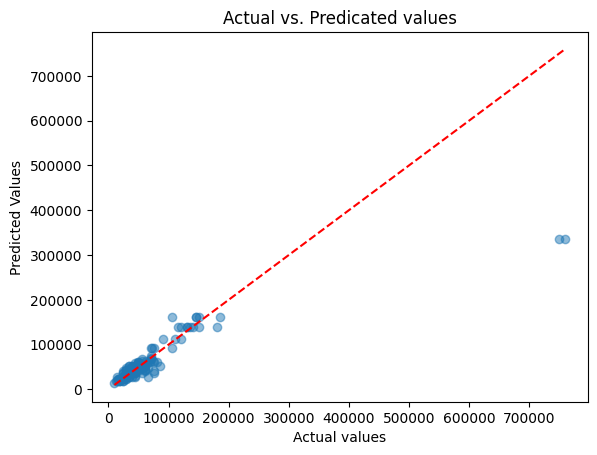

In [14]:
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **Random Forest Regressor**

In [15]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

res = r2_score(y_test, y_pred_rf)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_rf.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_rf))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_rf))

0.6653098015172072
Cross Val score  [0.49046936 0.76125206 0.71220391 0.80753635 0.27485596] 0.6092635297689419 0.19947422141852597
Best Params to use  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute error: 15716.649239
Root Mean Squared error: 54585.780378


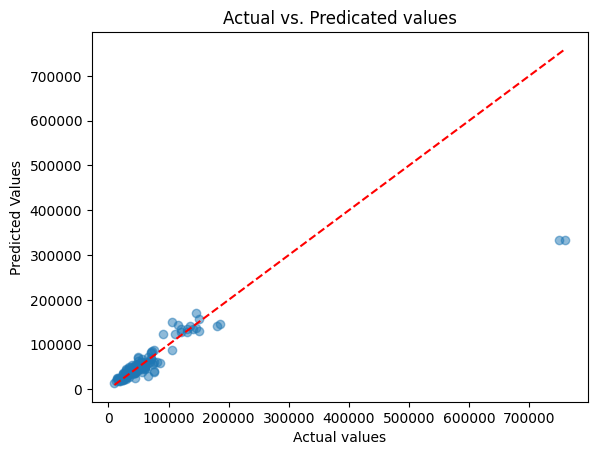

In [16]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **XGBOOST**

In [17]:
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [5,6,7],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_model = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb = grid_search_xgb.predict(X_test)

res = r2_score(y_test, y_pred_xgb)
print(res)

score = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_xgb.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_xgb))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_xgb))

0.7103310365111606
Cross Val score  [0.83536667 0.74744693 0.78759307 0.90655399 0.81519649] 0.8184314303561158 0.053014443932125066
Best Params to use  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}
Mean Absolute error: 14930.010525
Root Mean Squared error: 50781.907391


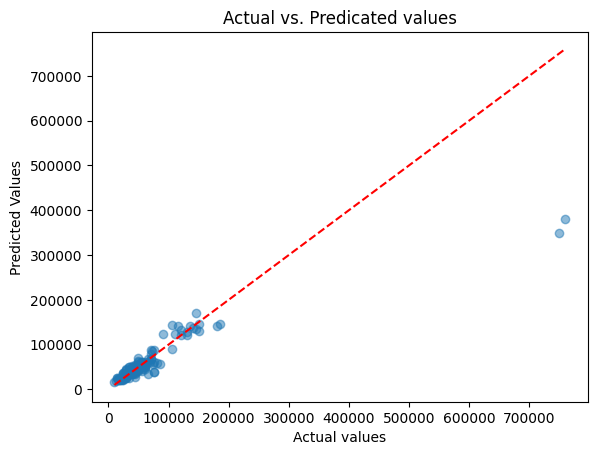

In [18]:
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()